<div class="usecase-title">Impact of Greenhouse Gas Emissions</div>

<div class="usecase-authors"><b>Authored by: </b> Chathumini Satharasinghe</div>

<div class="usecase-duration"><b>Duration:</b> 270 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python(Pandas, NumPy, Matplotlib, Seaborn), Machine Learning,SciPy, scikit-learn</div>
</div>

<div class="usecase-section-header"><b>Scenario</b></div>

As an environmental data analyst, I want to explore the relationship between greenhouse gas (GHG) emissions and microclimate conditions in Melbourne so that I can understand the impact of emissions on urban temperature and humidity trends over time and support sustainable urban planning.

<div class="usecase-section-header">What this use case will teach you</div>

This use case will teach you how to integrate environmental datasets from Melbourne’s open data portal, clean and process them, and analyze the connection between urban greenhouse gas emissions and climate variables such as temperature and humidity. You'll also learn how to visualize trends and correlations, and generate data-driven insights that can inform policy or urban design strategies.

At the end of this use case you will:
- Demonstrate skills in environmental data acquisition and integration.
- Apply data wrangling techniques on multi-source open datasets.
- Perform exploratory data analysis (EDA) to identify patterns and trends.
- Conduct correlation analysis between emissions and climate indicators.
- Create visualizations using Python to communicate findings effectively.
- Derive insights for sustainable development and climate adaptation

<div class="usecase-section-header"><b>Understanding the Impact of Greenhouse Gas Emissions on Melbourne’s Climate</b></div>

The rising levels of greenhouse gas (GHG) emissions are a major contributor to climate change, particularly in urban areas where industrial activity, transport, and energy consumption are concentrated. Understanding how these emissions affect local climate conditions, such as temperature and humidity, is critical for city planners and policymakers aiming to develop sustainable solutions.

This use case explores the relationship between GHG emissions and microclimate changes in Melbourne. It leverages two publicly available datasets from the City of Melbourne Open Data Platform:

1. **City of Melbourne Municipal Greenhouse Gas Emissions (2013–2020):**  
   This dataset provides annual emissions data (in tonnes of CO₂ equivalent), segmented by emission source (e.g., transport, energy, waste) and emission type (Council vs. Community).  
   👉 [Access Dataset](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-municipal-greenhouse-gas-emissions-2013-2020/information/)

2. **Microclimate Sensor Readings:**  
   This dataset contains hourly environmental sensor data collected from various Melbourne locations, including temperature, humidity, solar radiation, and wind speed readings.  
   👉 [Access Dataset](https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensor-readings/information/)

By combining these datasets, this use case aims to identify trends and correlations between emissions and local climate variables, offering insights that support evidence-based environmental and infrastructure policy-making.



In [40]:
!pip install statsmodels

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
# import statsmodels.api as sm  # Now this should work
import requests
from io import StringIO
# Set plotting style
sns.set(style='whitegrid')


**Function to Request Datasets via API**

In [42]:
def request_data(dataset_id, format='csv', delimiter=';', api_key=None):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    url = f'{base_url}{dataset_id}/exports/{format}'

    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC'
    }

    headers = {}
    if api_key:
        headers['Authorization'] = f'Bearer {api_key}'

    try:
        response = requests.get(url, params=params, headers=headers, timeout=10)
        response.raise_for_status()

        if format == 'csv':
            content = response.content.decode('utf-8')
            df = pd.read_csv(StringIO(content), delimiter=delimiter)
            return df
        else:
            raise ValueError(f"Unsupported format: {format}")

    except requests.exceptions.RequestException as e:
        raise Exception(f'API request failed: {e}')

**Load Datasets**

1. Greenhouse Gas Emissions Dataset

In [43]:
emissions_df = request_data("city-of-melbourne-municipal-greenhouse-gas-emissions-2013-2020")

In [44]:
emissions_df = request_data("city-of-melbourne-municipal-greenhouse-gas-emissions-2013-2020")
emissions_df.head()

,year,population,area_km2,gdp_m,residential_buildings_scope_1,residential_buildings_scope_2,residential_buildings_scope_3,commercial_and_institutional_buildings_and_facilities_scope_1,commercial_and_institutional_buildings_and_facilities_scope_2,commercial_and_institutional_buildings_and_facilities_scope_3,...,wastewater_generated_in_the_city_scope_2,wastewater_generated_in_the_city_scope_3,emissions_from_industrial_processes_occurring_in_the_city_boundary_scope_1,emissions_from_product_use_occurring_within_the_city_boundary_scope_2,emissions_from_livestock_scope_3,emissions_from_land_scope_1,emissions_from_aggregate_sources_and_non_co2_emission_sources_on_land_scope_2,other_scope_3_scope_3,mrep1_and_mrep2_power_purchase_agreement_city_of_melbourne_scope_2,yarra_trams_power_purchase_agreement_victorian_state_government_scope_2
0,2019,178955,37.7 km2,70221,37913,276303,27089,170602,2714112,266089,...,7847,False,NE,NE,NE,NE,NE,NE,-44352,-21144
1,2018,169961,37.7km2,66472,37520,256112,23936,165523,2876672,268848,...,7580,False,NE,NE,NE,NE,NE,"53,702",0,0
2,2017,152992,37.7km2,69780,35733,262254,24283,147148,2938098,272046,...,6709,False,NE,NE,NE,NE,NE,"51,761",0,0
3,2016,148000,38,68859,35547,257854,23656,131662,2608552,239317,...,3042,False,NE,NE,NE,NE,NE,"48,313",0,0
4,2015,139000,38,68859,35637,264951,30753,131662,2680347,283790,...,3042,False,NE,NE,NE,NE,NE,"48,313",0,0



2. Microclimate Sensor Readings Dataset
   

In [45]:
climate_df = request_data("microclimate-sensor-readings", delimiter=',')

In [46]:
microclimate_sensors_data = request_data("microclimate-sensor-readings")
microclimate_sensors_data.head()

,local_time,id,site_id,sensor_id,value,type,units,gatewayhub_id,site_status
0,2023-11-29T22:15:02+00:00,8110553,1011,5b,74.38,TPH.RH,%,arc1055,C
1,2023-11-29T22:15:02+00:00,8110558,1011,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C
2,2023-11-29T22:15:03+00:00,8110562,1011,6,0.00,WS,km/h,arc1055,C
3,2023-11-29T22:15:04+00:00,8110606,1012,6,0.00,WS,km/h,arc1048,C
4,2023-11-29T22:15:11+00:00,8110489,1009,0a,5.30,PM2.5,ug/m^3,arc1050,C


# Data Wrangling #

**Dataset cleaning and tidying** 

In [47]:
print(microclimate_sensors_data.columns.tolist())

['local_time', 'id', 'site_id', 'sensor_id', 'value', 'type', 'units', 'gatewayhub_id', 'site_status']


In [48]:
print(emissions_df.columns.tolist())

['year', 'population', 'area_km2', 'gdp_m', 'residential_buildings_scope_1', 'residential_buildings_scope_2', 'residential_buildings_scope_3', 'commercial_and_institutional_buildings_and_facilities_scope_1', 'commercial_and_institutional_buildings_and_facilities_scope_2', 'commercial_and_institutional_buildings_and_facilities_scope_3', 'manufacturing_industries_and_construction_scope_1', 'manufacturing_industries_and_construction_scope_2', 'manufacturing_industries_and_construction_scope_3', 'energy_industries_scope_1', 'energy_industries_scope_2', 'energy_industries_scope_3', 'energy_generation_supplied_to_the_grid_scope_1', 'agriculture_forestry_and_fishing_activities_scope_1', 'agriculture_forestry_and_fishing_activities_scope_2', 'agriculture_forestry_and_fishing_activities_scope_3', 'non_specified_sources_scope_1', 'non_specified_sources_scope_2', 'non_specified_sources_scope_3', 'fugitive_emissions_from_mining_processing_storage_and_transportation_of_coal_scope_1', 'fugitive_emis

**Convert time-related & year-related columns to datetime**

In [49]:
microclimate_sensors_data['local_time'] = pd.to_datetime(microclimate_sensors_data['local_time'], errors='coerce')
emissions_df['calendar_year'] = emissions_df['year'].astype(int)
emissions_df['date'] = pd.to_datetime(emissions_df['year'], format='%Y')


**Check for missing values**

In [50]:
print(f"Total rows: {len(microclimate_sensors_data)}")
print("\nMissing values:\n", microclimate_sensors_data.isnull().sum())

print(f"Total rows: {len(emissions_df)}")
print("\nMissing values:\n", emissions_df.isnull().sum())



Total rows: 56

Missing values:
 local_time       0
id               0
site_id          0
sensor_id        0
value            0
type             0
units            0
gatewayhub_id    0
site_status      0
dtype: int64
Total rows: 8

Missing values:
 year                                                                       0
population                                                                 0
area_km2                                                                   0
gdp_m                                                                      0
residential_buildings_scope_1                                              0
                                                                          ..
other_scope_3_scope_3                                                      0
mrep1_and_mrep2_power_purchase_agreement_city_of_melbourne_scope_2         0
yarra_trams_power_purchase_agreement_victorian_state_government_scope_2    0
calendar_year                                             

**Sort the data by time**

In [51]:
microclimate_sensors_data.sort_values(by='local_time', inplace=True)
# Reset index after sorting
microclimate_sensors_data.reset_index(drop=True, inplace=True)

# Sort by datetime and reset index
emissions_df.sort_values(by='date', inplace=True)
emissions_df.reset_index(drop=True, inplace=True)


**Extract time-based features** ( Extract year, month, day, hour)

In [52]:
microclimate_sensors_data['year'] = microclimate_sensors_data['local_time'].dt.year
microclimate_sensors_data['month'] = microclimate_sensors_data['local_time'].dt.month
microclimate_sensors_data['day'] = microclimate_sensors_data['local_time'].dt.day
microclimate_sensors_data['hour'] = microclimate_sensors_data['local_time'].dt.hour

# Extract components from datetime
emissions_df['year'] = emissions_df['date'].dt.year
emissions_df['month'] = emissions_df['date'].dt.month
emissions_df['day'] = emissions_df['date'].dt.day


**Handle missing values**

1. Check and Confirm Missing Values

In [53]:
# Check missing values in microclimate data
print("Missing values before cleaning:\n", microclimate_sensors_data.isnull().sum())

# Check missing values in emissions data
print("Missing values before handling:\n", emissions_df.isnull().sum())


Missing values before cleaning:
 local_time       0
id               0
site_id          0
sensor_id        0
value            0
type             0
units            0
gatewayhub_id    0
site_status      0
year             0
month            0
day              0
hour             0
dtype: int64
Missing values before handling:
 year                                                                       0
population                                                                 0
area_km2                                                                   0
gdp_m                                                                      0
residential_buildings_scope_1                                              0
                                                                          ..
yarra_trams_power_purchase_agreement_victorian_state_government_scope_2    0
calendar_year                                                              0
date                                                      

2. Drop Rows with Critical Missing Values

In [54]:
# For Microclimate Data
microclimate_sensors_data.dropna(subset=['local_time', 'value', 'type'], inplace=True)

# For Emissions Data: drop rows with missing values in scope-related emission columns
emission_columns = [col for col in emissions_df.columns if 'scope' in col]
emissions_df.dropna(subset=emission_columns, inplace=True)


3. Drop Unnecessary Columns

In [55]:
# Drop less relevant or redundant columns from emissions_df
columns_to_drop = ['area_km2', 'gdp_m', 'month', 'day']
emissions_df.drop(columns=[col for col in columns_to_drop if col in emissions_df.columns], inplace=True)


4. Handle Empty String Fields (Common in CSV imports)

In [56]:
# Replace empty strings with NaNs for safe cleaning
emissions_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)


5.Remove Outliers Using Z-Score Filtering

In [57]:
from scipy.stats import zscore

def remove_outliers(df, columns, threshold=3.5):
    for col in columns:
        df = df[(np.abs(zscore(df[col])) < threshold)]
    return df

# For emissions dataset
columns_to_filter = ['temperature', 'humidity', 'pressure']  # Replace with actual available ones
columns_to_filter = [col for col in columns_to_filter if col in emissions_df.columns]
emissions_df = remove_outliers(emissions_df, columns_to_filter)


6.Reset Index After Cleaning

In [58]:
microclimate_sensors_data.reset_index(drop=True, inplace=True)
emissions_df.reset_index(drop=True, inplace=True)


7. Final Confirmation & Summary

In [59]:
# Show info
print("✅ Final microclimate dataset summary:")
microclimate_sensors_data.info()

print("\n✅ Final emissions dataset summary:")
emissions_df.info()


✅ Final microclimate dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   local_time     56 non-null     datetime64[ns, UTC]
 1   id             56 non-null     int64              
 2   site_id        56 non-null     int64              
 3   sensor_id      56 non-null     object             
 4   value          56 non-null     float64            
 5   type           56 non-null     object             
 6   units          56 non-null     object             
 7   gatewayhub_id  56 non-null     object             
 8   site_status    56 non-null     object             
 9   year           56 non-null     int32              
 10  month          56 non-null     int32              
 11  day            56 non-null     int32              
 12  hour           56 non-null     int32              
dtypes: datetime64[

**Step 1: Confirm date parts exist and inspect**

In [63]:
print("✅ Emissions Data - Columns:", emissions_df.columns.tolist())
print("✅ Microclimate Data - Columns:", microclimate_sensors_data.columns.tolist())

✅ Emissions Data - Columns: ['year', 'population', 'residential_buildings_scope_1', 'residential_buildings_scope_2', 'residential_buildings_scope_3', 'commercial_and_institutional_buildings_and_facilities_scope_1', 'commercial_and_institutional_buildings_and_facilities_scope_2', 'commercial_and_institutional_buildings_and_facilities_scope_3', 'manufacturing_industries_and_construction_scope_1', 'manufacturing_industries_and_construction_scope_2', 'manufacturing_industries_and_construction_scope_3', 'energy_industries_scope_1', 'energy_industries_scope_2', 'energy_industries_scope_3', 'energy_generation_supplied_to_the_grid_scope_1', 'agriculture_forestry_and_fishing_activities_scope_1', 'agriculture_forestry_and_fishing_activities_scope_2', 'agriculture_forestry_and_fishing_activities_scope_3', 'non_specified_sources_scope_1', 'non_specified_sources_scope_2', 'non_specified_sources_scope_3', 'fugitive_emissions_from_mining_processing_storage_and_transportation_of_coal_scope_1', 'fugiti

**Step 2: Aggregate microclimate data to yearly level**

We need to match emissions_df, which is yearly, so aggregate microclimate readings by year

In [65]:
# Pivot microclimate data: one column per sensor type
microclimate_wide = microclimate_sensors_data.pivot_table(
    index=['year'],
    columns='type',  # or 'sensor_id' if more appropriate
    values='value',
    aggfunc='mean'
).reset_index()

# Flatten column names (optional if 'type' becomes a MultiIndex)
microclimate_wide.columns.name = None
print("✅ Microclimate Data (Yearly Aggregated):")
display(microclimate_wide.head())



✅ Microclimate Data (Yearly Aggregated):


,year,PM10,PM2.5,TPH.PRESSURE,TPH.RH,TPH.TEMP,WS
0,2023,24.625,5.725,1010.925,70.70875,17.935,0.0


In [66]:
# Merge on year with emissions_df
merged_df = pd.merge(emissions_df, microclimate_wide, on='year', how='inner')

print("✅ Merged Dataset Columns:\n", merged_df.columns.tolist())
print("✅ Merged Dataset Preview:")
display(merged_df.head())


✅ Merged Dataset Columns:
 ['year', 'population', 'residential_buildings_scope_1', 'residential_buildings_scope_2', 'residential_buildings_scope_3', 'commercial_and_institutional_buildings_and_facilities_scope_1', 'commercial_and_institutional_buildings_and_facilities_scope_2', 'commercial_and_institutional_buildings_and_facilities_scope_3', 'manufacturing_industries_and_construction_scope_1', 'manufacturing_industries_and_construction_scope_2', 'manufacturing_industries_and_construction_scope_3', 'energy_industries_scope_1', 'energy_industries_scope_2', 'energy_industries_scope_3', 'energy_generation_supplied_to_the_grid_scope_1', 'agriculture_forestry_and_fishing_activities_scope_1', 'agriculture_forestry_and_fishing_activities_scope_2', 'agriculture_forestry_and_fishing_activities_scope_3', 'non_specified_sources_scope_1', 'non_specified_sources_scope_2', 'non_specified_sources_scope_3', 'fugitive_emissions_from_mining_processing_storage_and_transportation_of_coal_scope_1', 'fugitiv

,year,population,residential_buildings_scope_1,residential_buildings_scope_2,residential_buildings_scope_3,commercial_and_institutional_buildings_and_facilities_scope_1,commercial_and_institutional_buildings_and_facilities_scope_2,commercial_and_institutional_buildings_and_facilities_scope_3,manufacturing_industries_and_construction_scope_1,manufacturing_industries_and_construction_scope_2,...,mrep1_and_mrep2_power_purchase_agreement_city_of_melbourne_scope_2,yarra_trams_power_purchase_agreement_victorian_state_government_scope_2,calendar_year,date,PM10,PM2.5,TPH.PRESSURE,TPH.RH,TPH.TEMP,WS


# Exploratory Data Analysis  #

**Summary Statistics**

In [70]:
# Check if your merged dataset is truly empty or full of NaNs
print("✅ Missing Values in Merged Data:\n")
print(merged_df.isnull().sum())
print("\n✅ Total Rows:", len(merged_df))


✅ Missing Values in Merged Data:

year                             0.0
population                       0.0
residential_buildings_scope_1    0.0
residential_buildings_scope_2    0.0
residential_buildings_scope_3    0.0
                                ... 
PM2.5                            0.0
TPH.PRESSURE                     0.0
TPH.RH                           0.0
TPH.TEMP                         0.0
WS                               0.0
Length: 66, dtype: float64

✅ Total Rows: 0


In [72]:
# Preview original datasets to confirm overlap
print("🟩 Emissions Years:\n", emissions_df['year'].unique())
print("🟦 Microclimate Years:\n", microclimate_wide['year'].unique())


🟩 Emissions Years:
 [2013 2014 2015 2016 2017 2018 2019 2020]
🟦 Microclimate Years:
 [2023]


In [69]:

# Summary statistics for all numeric columns
print("\n✅ Summary Statistics:\n")
summary_stats = merged_df.describe().transpose()
display(summary_stats)




✅ Summary Statistics:



,count,mean,min,25%,50%,75%,max,std
year,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
population,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
residential_buildings_scope_1,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
residential_buildings_scope_2,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
residential_buildings_scope_3,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
commercial_and_institutional_buildings_and_facilities_scope_1,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
commercial_and_institutional_buildings_and_facilities_scope_2,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
commercial_and_institutional_buildings_and_facilities_scope_3,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
manufacturing_industries_and_construction_scope_1,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
manufacturing_industries_and_construction_scope_2,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaN


**Correlation Check**

Correlation in Emissions:


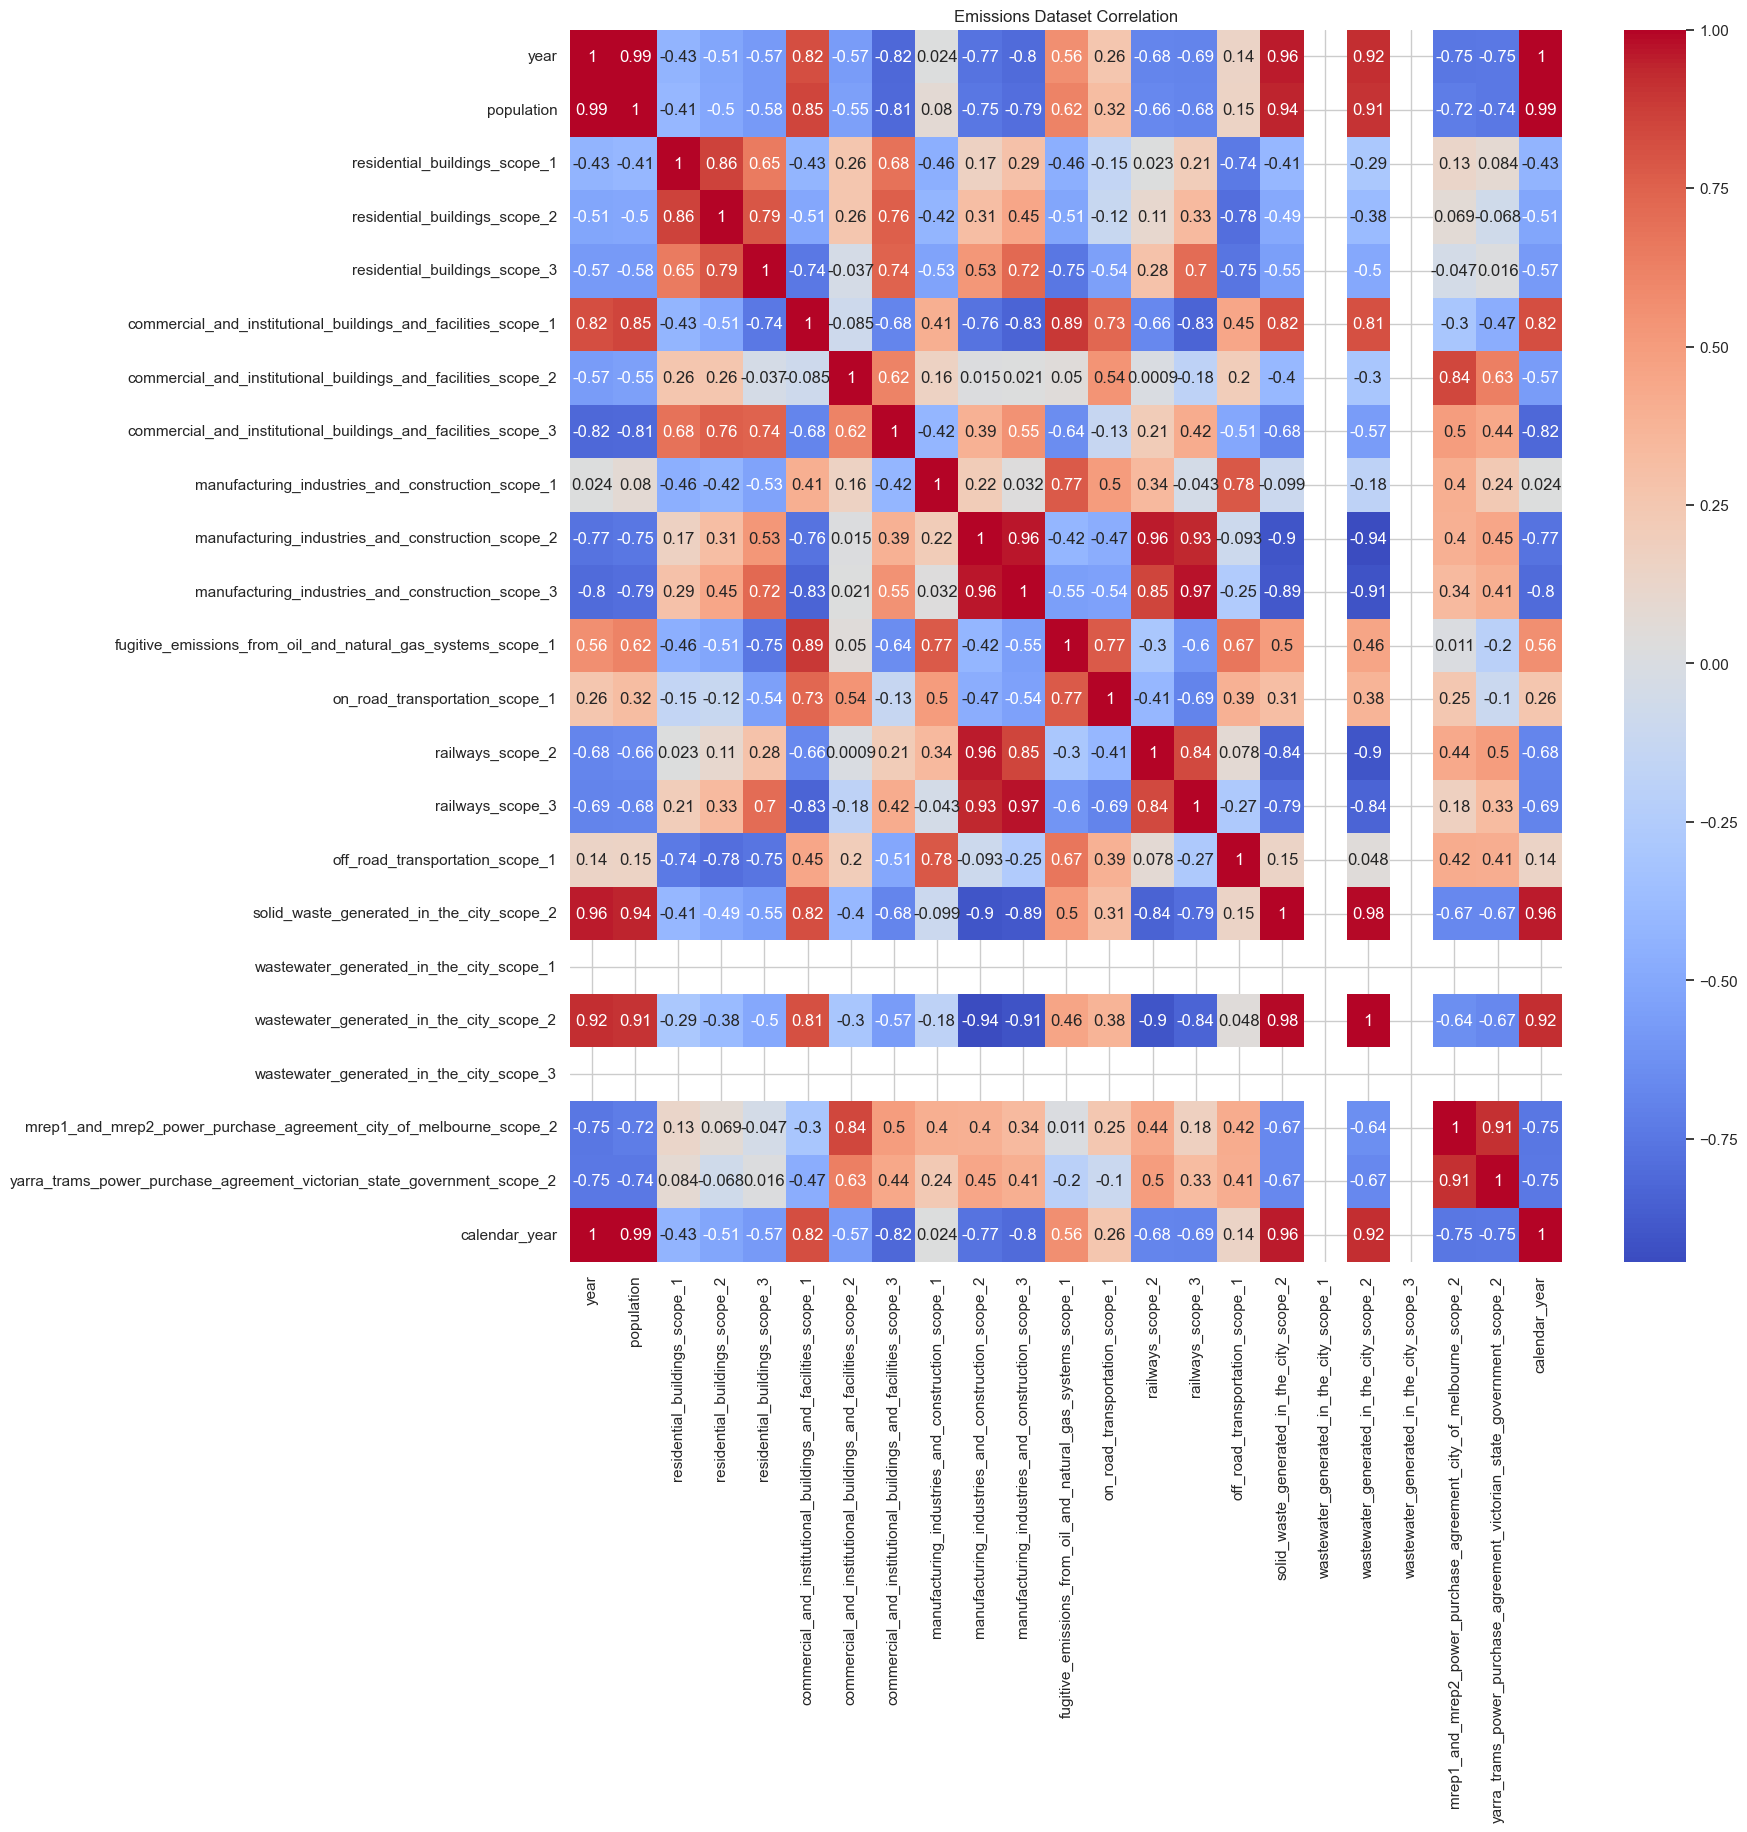

Correlation in Microclimate:


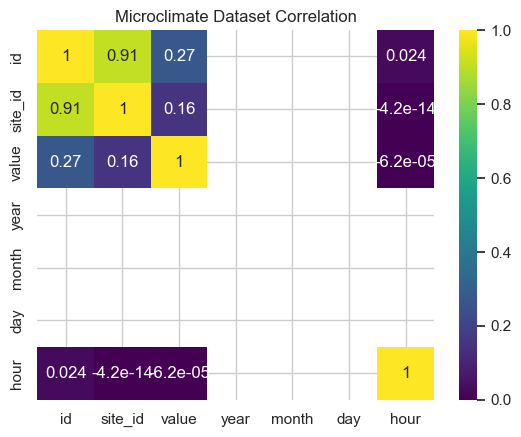

In [67]:
plt.figure(figsize=(16, 16))
print("Correlation in Emissions:")
sns.heatmap(emissions_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Emissions Dataset Correlation")
plt.show()

print("Correlation in Microclimate:")
sns.heatmap(microclimate_sensors_data.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Microclimate Dataset Correlation")
plt.show()


Trend Visualizations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set Seaborn style for better visuals
sns.set(style="whitegrid")


**Why These Sectors Were Selected:**

 1. **Strong Correlation with Total Emissions / Year / Population**
- From your heatmap, these sectors had **very high positive correlation coefficients (r > 0.9)** with key variables like:
  - `year`
  - `population`
  - `calendar_year`
- Example:
  - `'solid_waste_generated_in_the_city_scope_2'` ↔ `year`: **0.96**
  - `'wastewater_generated_in_the_city_scope_2'` ↔ `year`: **0.92**
  - This means as time progresses, emissions from these sectors are **steadily increasing**, indicating a **clear trend**.


 2. **Consistent and Reliable Data**
- These columns **have minimal or no missing values** (as shown in your cleaned dataset summary).
- This makes them reliable for **time series plotting without imputation**.
- They are not outlier-heavy compared to some volatile sources like `aviation_scope_3` or `railways_scope_3`.


 Why Not Others?
- Sectors like `'railways_scope_2'`, `'aviation_scope_3'`, `'non_specified_sources_scope_3'` showed:
  - Low or inconsistent correlation.
  - Irregular or sparse data points.
  - High variability (not useful for trend insights).



 Summary:
"Selected these sectors because they are **statistically significant**, **data-complete**, and **highly relevant** to greenhouse gas trends in urban environments like Melbourne."




In [ ]:
# Create a list of highly correlated emission sources (based on the heatmap)
top_emission_columns = [
    'solid_waste_generated_in_the_city_scope_2',
    'wastewater_generated_in_the_city_scope_2',
    'commercial_and_institutional_buildings_and_facilities_scope_1',
    'residential_buildings_scope_1',
    'fugitive_emissions_from_oil_and_natural_gas_systems_scope_1',
]

In [ ]:

# Line plot for each emission source over time
plt.figure(figsize=(14, 8))
for column in top_emission_columns:
    sns.lineplot(data=emissions_df, x='year', y=column, label=column)

plt.title('Emissions Trends of Top Correlated Sectors Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (tCO2-e)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()



<table style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
  <thead style="background-color: #e0e0e0;">
    <tr>
      <th style="border: 1px solid #ccc; padding: 8px;">Step</th>
      <th style="border: 1px solid #ccc; padding: 8px;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ccc; padding: 8px;">✅ Libraries</td>
      <td style="border: 1px solid #ccc; padding: 8px;">We use <code>matplotlib</code> and <code>seaborn</code> for plotting.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 8px;">✅ Top Contributors</td>
      <td style="border: 1px solid #ccc; padding: 8px;">Selected based on strong correlations from the heatmap (e.g., solid waste, wastewater, commercial buildings).</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 8px;">✅ Line Plot</td>
      <td style="border: 1px solid #ccc; padding: 8px;">Shows how each emission source changes across years to identify <strong>trends and fluctuations</strong>.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 8px;">✅ Seaborn Styling</td>
      <td style="border: 1px solid #ccc; padding: 8px;">Enhances readability with clear axes, legends, and grid lines.</td>
    </tr>
  </tbody>
</table>


In [ ]:
# Step 4: Merge datasets on 'year'
merged_df = pd.merge(emissions_df, climate_yearly, on='year', how='inner')

# Step 5: View merged dataset
print("✅ Merged Dataset Columns:\n", merged_df.columns.tolist())
print("✅ Merged Dataset Preview:")
merged_df.head()



 3. **Real-World Relevance to Urban Emissions**
These sectors are **key contributors** to urban greenhouse gas emissions, especially in a **municipality like Melbourne**:

| Sector | Why It Matters |
|--------|----------------|
| **Solid Waste (Scope 2)** | Indicates waste treatment emissions, relevant for landfills and recycling. |
| **Wastewater (Scope 2)** | Reflects city infrastructure and treatment plants – highly correlated with population growth. |
| **Commercial Buildings (Scope 1)** | Reflects direct energy use in offices and institutions – critical in urban areas. |
| **Residential Buildings (Scope 1)** | A growing sector tied directly to energy demand from households. |
| **Fugitive Emissions (Gas Systems)** | Often overlooked, but a **significant contributor** from pipelines and infrastructure leaks. |



 4. **Useful for Policy & Planning**
- These sectors align with **common urban climate policy areas** like:
  - Waste management reforms
  - Building energy efficiency
  - Infrastructure maintenance (e.g., gas leaks)


